# Advertising Linear Regression Model


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
sales_data = pd.read_csv('/content/advertising.csv')

In [3]:
sales_data.head()


TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Perform exploratory data analysis (EDA)

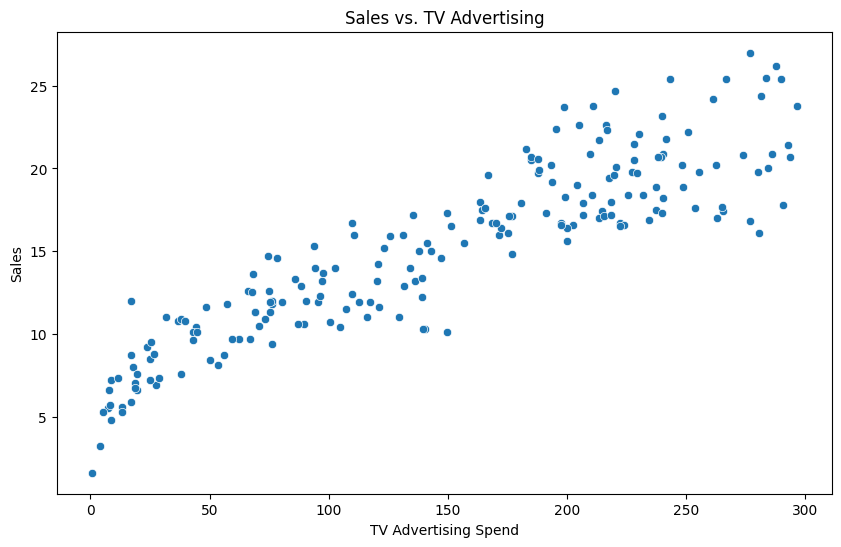

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

In [5]:
# Visualizing the relationship between TV advertising and sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=sales_data)
plt.title('Sales vs. TV Advertising')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.show()

# Calculating summary statistics
sales_data.describe()


### Prepare the data for modeling , train the and evaluate the model

In [6]:
# Defining the feature and target variable
X = sales_data[['TV']]
y = sales_data['Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [7]:
#defining the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
# Making predictions
y_pred = lr.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Coefficients
print('Intercept:', lr.intercept_)
print('Coefficient:', lr.coef_)


Mean Squared Error: 4.625979846897806
R-squared: 0.8367991793978931
Intercept: 7.149110321677147
Coefficient: [0.05492636]


### Visualize the results

In [9]:
# Plotting the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=sales_data)
plt.plot(X_test, y_pred, color='green', linewidth=2)
plt.title('Sales vs. TV Advertising with Regression Line')
plt.xlabel('TV Advertising Spend (in thousands)')
plt.ylabel('Sales (in thousands)')
plt.show()
